## Perform KMeans clustering for the crime data to obtain optimum number of clusters.

In [1]:
#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [2]:
df_crime = pd.read_csv(r'D:\360digi\DS\Sharath\Hierarchical_clustering2\HandsOn\Dataset_Assignment Clustering\crime_data.csv')
df_crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
#rename the column 'Unnamed: 0'
df_crime = df_crime.rename(columns = {'Unnamed: 0': 'State'})
df_crime.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

## EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
# 1st Moment Business Decision (Measures of Central Tendency)
print(df_crime.mean())
print('\n')
print(df_crime.median())
print('\n')
print(df_crime.mode())

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64


Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64


             State  Murder  Assault  UrbanPop  Rape
0          Alabama     2.1    120.0      66.0  14.9
1           Alaska     2.2      NaN      80.0  16.3
2          Arizona     2.6      NaN       NaN   NaN
3         Arkansas     6.0      NaN       NaN   NaN
4       California     9.0      NaN       NaN   NaN
5         Colorado    13.2      NaN       NaN   NaN
6      Connecticut    15.4      NaN       NaN   NaN
7         Delaware     NaN      NaN       NaN   NaN
8          Florida     NaN      NaN       NaN   NaN
9          Georgia     NaN      NaN       NaN   NaN
10          Hawaii     NaN      NaN       NaN   NaN
11           Idaho     NaN      NaN       NaN   NaN
12        Illinois     NaN      NaN       NaN   NaN
13         Indiana     NaN      NaN       NaN   NaN
14            Iowa     NaN    

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [5]:
#2nd Moment Business Decision (Measures of Dispersion)
print(df_crime.var())
print('\n')
print(df_crime.std())

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64


D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [6]:
#3rd Business Moment Decision (Skewness)
df_crime.skew()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [7]:
# 4th Business Moment Decision (Kurtosis)
df_crime.kurt()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

In [8]:
df_crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
df_crime.dtypes

State        object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

### Data Preprocessing and Cleaning

In [10]:
# Handling duplicates:
duplicate = df_crime.duplicated()
print(duplicate)
sum(duplicate) #no duplicates in the data

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool


0

In [11]:
#Missing value analysis
df_crime.isnull().sum() #No missing values in the data

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [12]:
# Dividing categorical and numerical variables from the dataset
df_crime_cate = df_crime.iloc[:, 0]
df_crime_cate.head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: State, dtype: object

In [13]:
df_crime_num = df_crime.iloc[:,1:]
df_crime_num.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


#### Box Plot

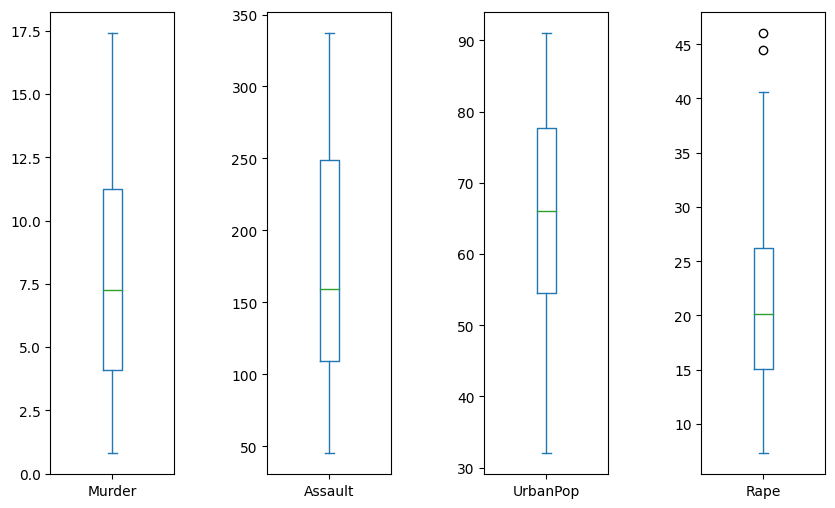

In [14]:
# Visualize numeric data using boxplot for outliers

df_crime_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

plt.subplots_adjust(wspace = 0.75)
plt.show()

##### Boxplot shows outliers in column 'Rape'. 

We need to use Winsorization technique to remove the outliers.

In [15]:
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Rape'])

df_crime_num['Rape'] = winsor.fit_transform(df_crime_num[['Rape']])



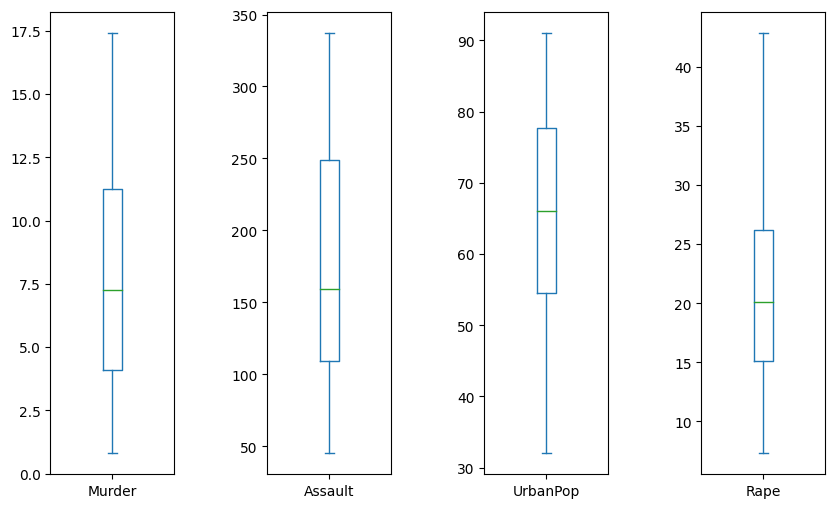

In [16]:
#Verify the outliers removal
df_crime_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10,6))

plt.subplots_adjust(wspace = 0.75)
plt.show()

In [17]:
# Zero and near zero variance
df_crime_num.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          83.182041
dtype: float64

In [18]:
#Converting Series object to Dataframe
df_crime_cate = df_crime_cate.to_frame()

In [19]:
df_crime_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


In [20]:
print(df_crime_cate.State.unique())
print('\n')

print(df_crime_cate.State.value_counts())

# df_crime_cate

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Alabama           1
Pennsylvania      1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Oregon            1
Rhode Island      1
Alaska            1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             1
Utah              1
Vermont           1
Virginia         

#### Graphical Representation

In [21]:
df_crime_num.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

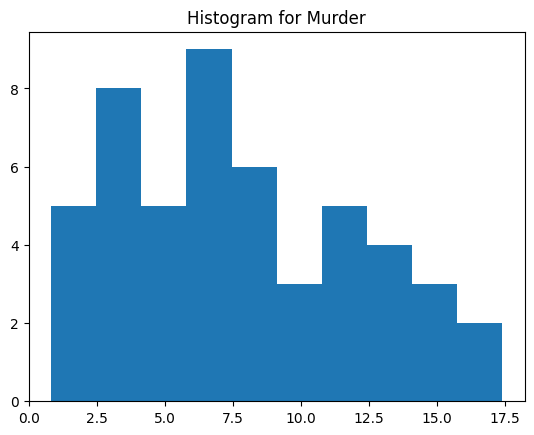

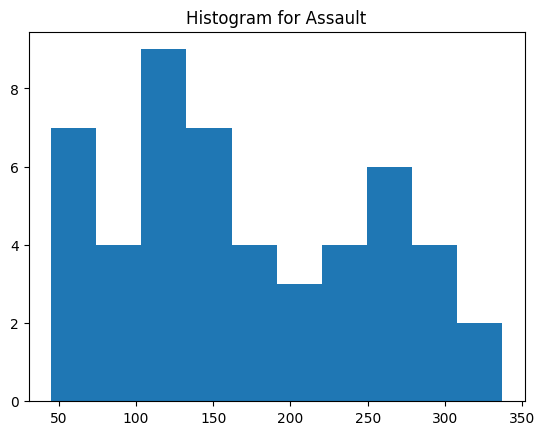

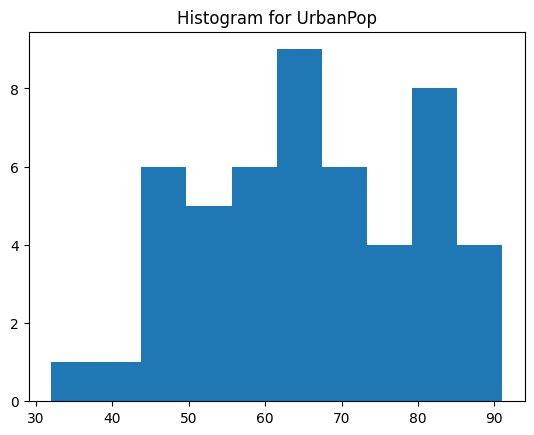

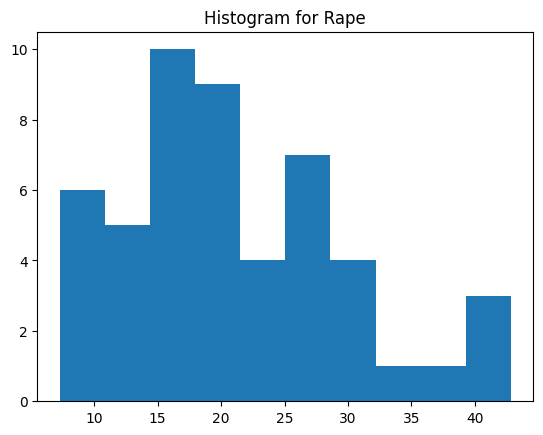

In [22]:
# Histogram describes the spread of data

for i in df_crime_num.columns:
    plt.hist(x = df_crime_num[i])
    plt.title("Histogram for " +str(i))
    plt.show()

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 0.8,  2.1,  2.1,  2.2,  2.2,  2.6,  2.6,  2.7,  3.2,  3.3,  3.4,
          3.8,  4. ,  4.3,  4.4,  4.9,  5.3,  5.7,  5.9,  6. ,  6. ,  6.3,
          6.6,  6.8,  7.2,  7.3,  7.4,  7.9,  8.1,  8.5,  8.8,  9. ,  9. ,
          9.7, 10. , 10.4, 11.1, 

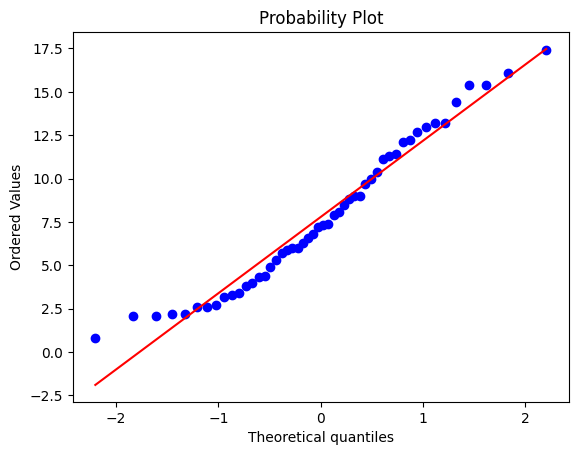

In [23]:
# Normal Q-Q Plot - Helps to understand if data is distributed Normally or not.
import scipy.stats as stats
import pylab

stats.probplot(df_crime_num.Murder, dist = "norm", plot = pylab)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 45,  46,  48,  53,  56,  57,  72,  81,  83,  86, 102, 106, 109,
         109, 110, 113, 115, 120, 120, 120, 145, 149, 151, 156, 159, 159,
         161, 174, 178, 188, 190, 201, 204, 211, 236, 238, 249, 249, 252,
         254, 255, 259, 263, 276, 27

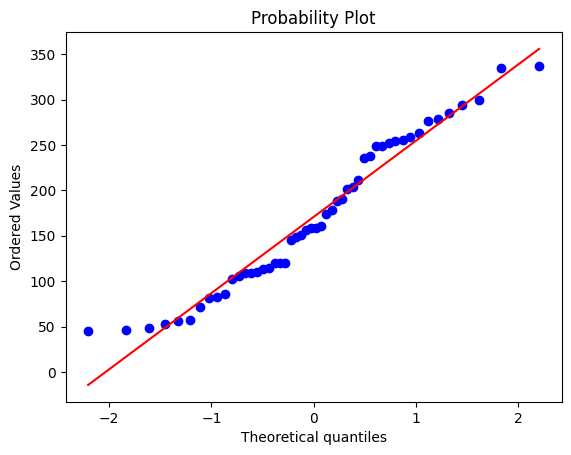

In [24]:
stats.probplot(df_crime_num.Assault, dist = "norm", plot = pylab)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([32, 39, 44, 44, 45, 45, 48, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59,
         60, 60, 62, 63, 65, 66, 66, 66, 66, 67, 67, 68, 70, 70, 72, 72, 73,
         74, 75, 77, 78, 80, 80, 80, 80, 81, 83, 83, 85, 86, 87, 89, 91],
        dtype=int64)),
 (14.73

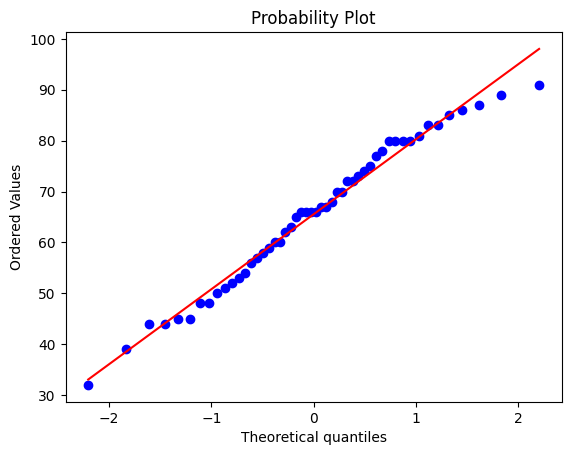

In [25]:
stats.probplot(df_crime_num.UrbanPop, dist = "norm", plot = pylab)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 7.3  ,  7.8  ,  8.3  ,  9.3  ,  9.5  , 10.8  , 11.1  , 11.2  ,
         11.3  , 12.8  , 14.2  , 14.9  , 14.9  , 15.6  , 15.8  , 16.1  ,
         16.3  , 16.3  , 16.4  , 16.5  , 17.1  , 18.   , 18.8  , 19.5  ,
         20.   , 20.2  , 20.7  , 21.   

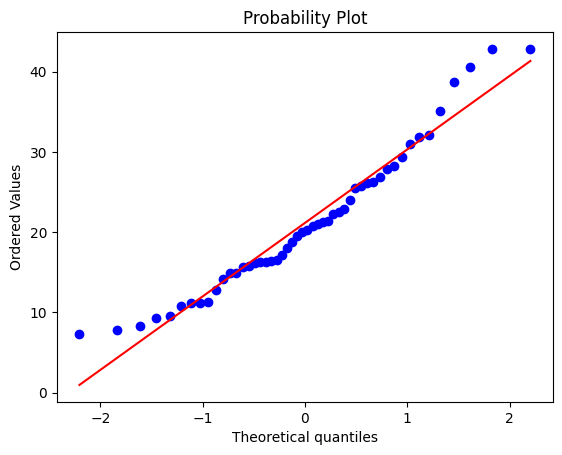

In [26]:
stats.probplot(df_crime_num.Rape, dist = "norm", plot = pylab)

In [27]:
df_new = pd.concat([df_crime_cate, df_crime_num], axis = 1)
df_new.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.200
1,Alaska,10.0,263,48,42.825
2,Arizona,8.1,294,80,31.000
3,Arkansas,8.8,190,50,19.500
4,California,9.0,276,91,40.600


In [28]:
df_new.shape

(50, 5)

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


#### Scatter Plot

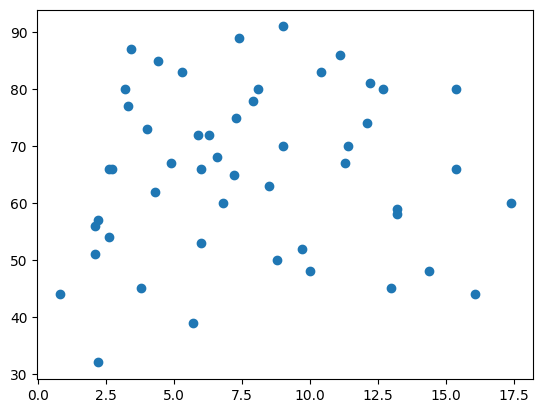

In [30]:
plt.scatter(x = df_new['Murder'], y = df_new['UrbanPop'])

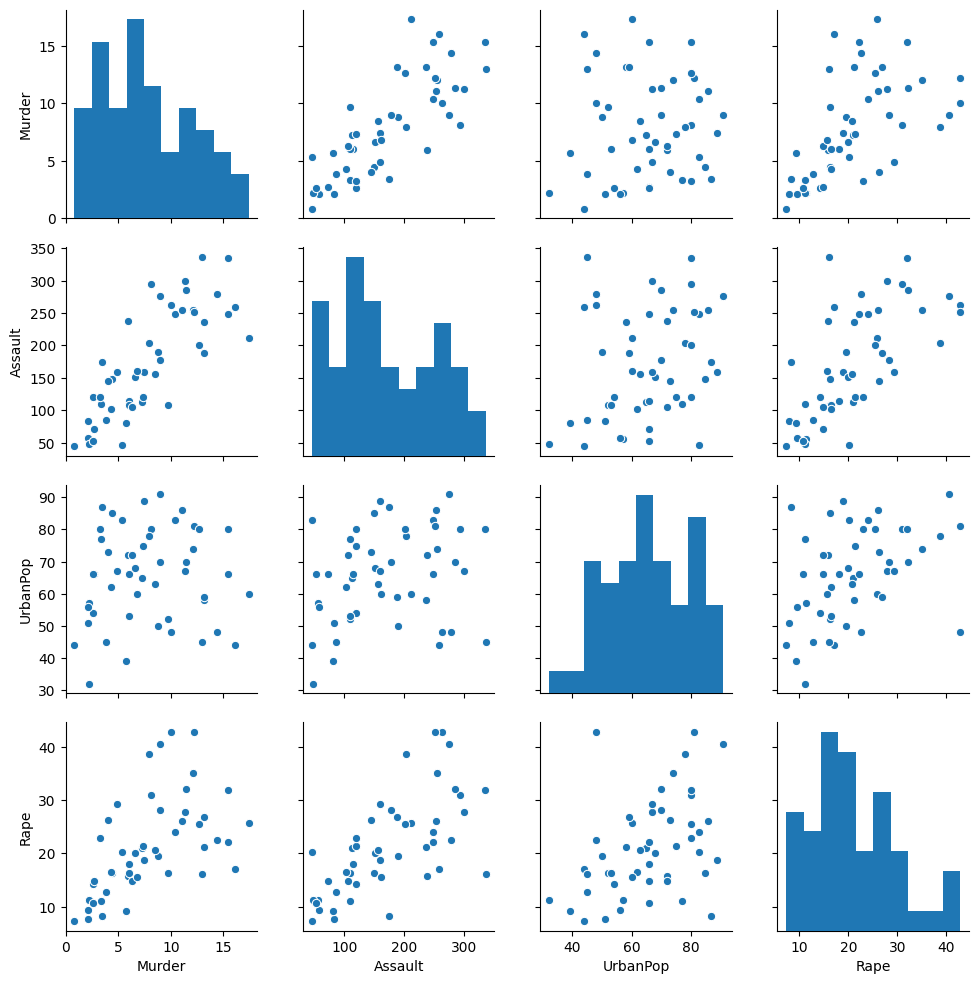

In [31]:
sns.pairplot(df_new)

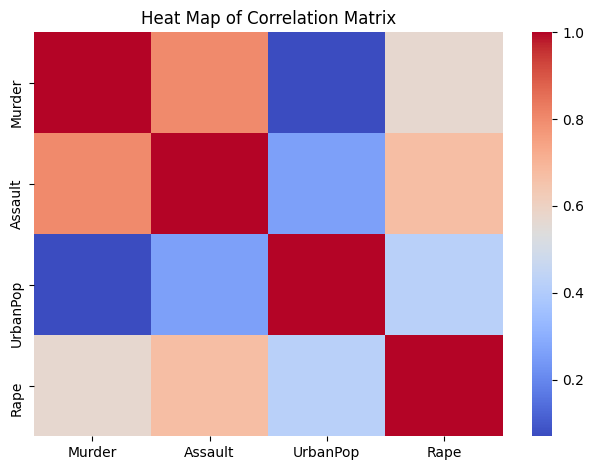

In [32]:
# Heatmap
corrmatrix = df_new.corr(method = "pearson")

sns.heatmap(corrmatrix, xticklabels = corrmatrix.columns, yticklabels = corrmatrix.columns, cmap = "coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

In [33]:
# Normalization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [34]:
cols = list(df_crime_num.columns)
print(cols)

['Murder', 'Assault', 'UrbanPop', 'Rape']


In [35]:
pipe1 = make_pipeline(MinMaxScaler())

In [36]:
df_pipelined = pd.DataFrame(pipe1.fit_transform(df_crime_num), columns = cols, index = df_crime_num.index)
df_pipelined.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.391274
1,0.554217,0.746575,0.271186,1.000000
2,0.439759,0.852740,0.813559,0.667136
3,0.481928,0.496575,0.305085,0.343420
4,0.493976,0.791096,1.000000,0.937368


In [37]:
df_pipelined.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.389444
std,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.218860
50%,0.388554,0.390411,0.576271,0.360310
75%,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000


### Hierarchical Clustering

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

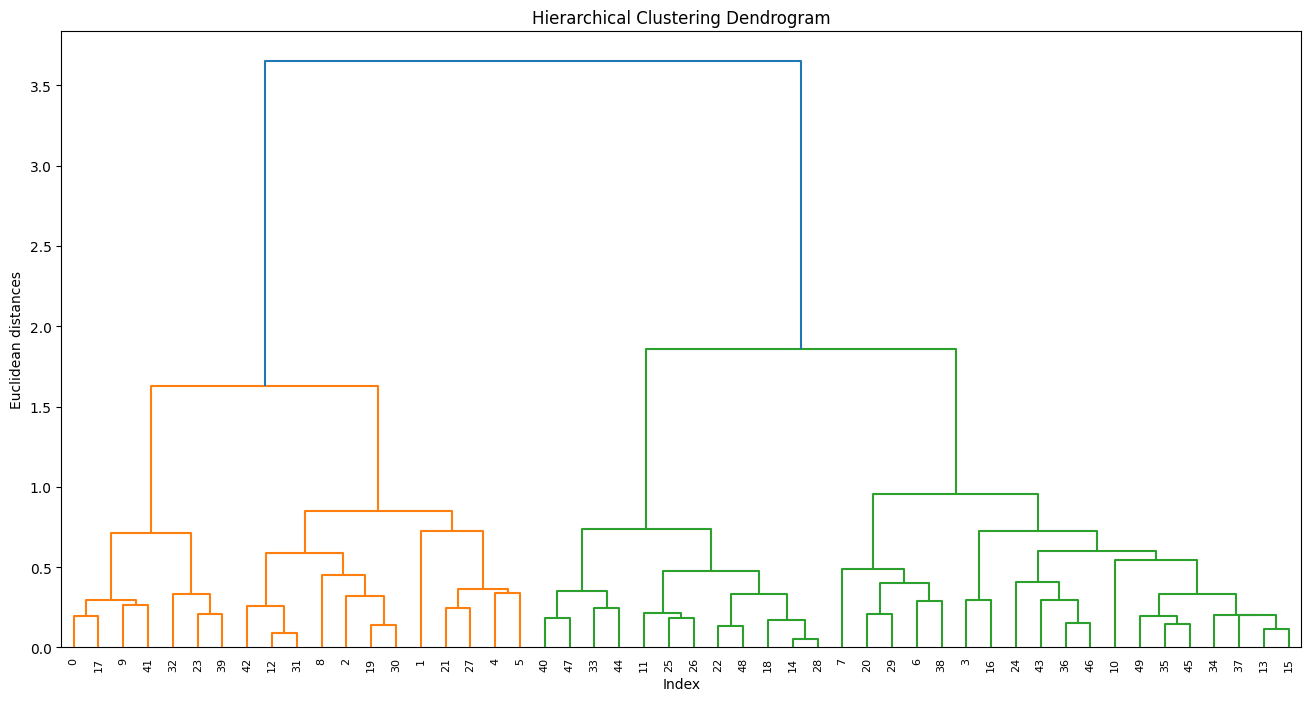

In [39]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_pipelined, method = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [40]:
# Applying AgglomerativeClustering choosing 2 as clusters from the above dendrogram
# complete linkage
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')

y_hc1 = hc1.fit_predict(df_pipelined)
y_hc1

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [41]:
# average linkage
hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_pipelined)
y_hc2

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [42]:
# single linkage
hc3 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_pipelined)
y_hc3

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
hc1.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [44]:
cluster_labels = pd.Series(hc1.labels_)

In [45]:
df_clust = pd.concat([cluster_labels, df_crime_num], axis = 1)

df_clust.head()

,0,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.200
1,0,10.0,263,48,42.825
2,0,8.1,294,80,31.000
3,1,8.8,190,50,19.500
4,0,9.0,276,91,40.600


In [46]:
df_clust.columns

Index([0, 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [47]:
df_clust = df_clust.rename(columns = {0 : 'cluster'})
df_clust.head()

,cluster,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.200
1,0,10.0,263,48,42.825
2,0,8.1,294,80,31.000
3,1,8.8,190,50,19.500
4,0,9.0,276,91,40.600


### Cluster Evaluation

In [48]:
 #Silhouette coefficient
from sklearn import metrics

In [ ]:
# Silhouette coefficient value ranges between (-1 to +1). 
# 1 being the best meaning that the data point is very compact within the cluster to which it belongs and far away from the other clusters.
# Values near 0 denote overlapping clusters.

In [49]:
metrics.silhouette_score(df_pipelined, cluster_labels)

0.4211268756375124

In [50]:
#Calinski Harabasz:
metrics.calinski_harabasz_score(df_pipelined, cluster_labels) #Higher value means clusters are well separated

46.568728344372175

In [51]:
#Davies-Bouldin Index:
metrics.davies_bouldin_score(df_pipelined, cluster_labels) # The lower the score the better the separation between your clusters.

0.9316511465252717

In [52]:
from clusteval import clusteval

# Silhouette cluster evaluation.
ce = clusteval(evaluate='silhouette')

In [53]:
df_array = np.array(df_pipelined)


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 1306.73it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


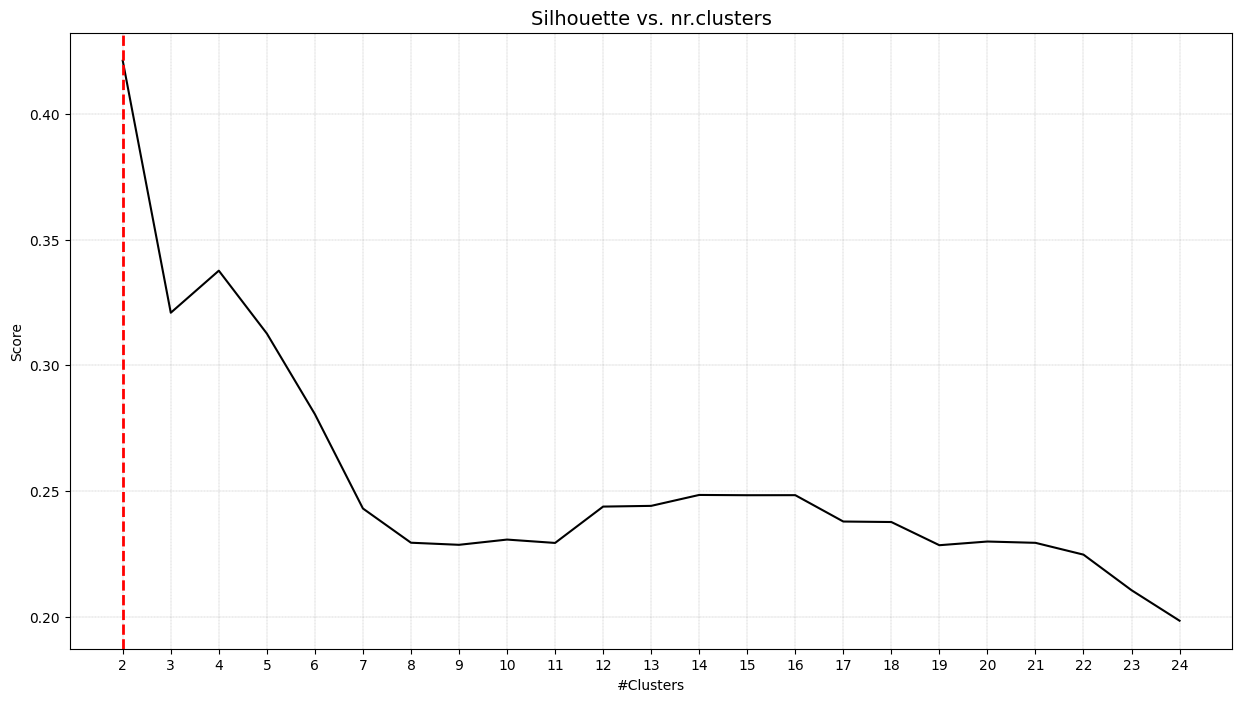

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [54]:
#Fit
ce.fit(df_array)

#Plot
ce.plot()

In [55]:
df_clust.head()

,cluster,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.200
1,0,10.0,263,48,42.825
2,0,8.1,294,80,31.000
3,1,8.8,190,50,19.500
4,0,9.0,276,91,40.600


In [56]:
df_clust = pd.concat([df_crime_cate, df_clust], axis=1)
df_clust.head()

,State,cluster,Murder,Assault,UrbanPop,Rape
0,Alabama,0,13.2,236,58,21.200
1,Alaska,0,10.0,263,48,42.825
2,Arizona,0,8.1,294,80,31.000
3,Arkansas,1,8.8,190,50,19.500
4,California,0,9.0,276,91,40.600


In [57]:
df1 = df_clust.sort_values(by = 'cluster', ascending = True)
df1

,State,cluster,Murder,Assault,UrbanPop,Rape
0,Alabama,0,13.2,236,58,21.200
32,North Carolina,0,13.0,337,45,16.100
27,Nevada,0,12.2,252,81,42.825
23,Mississippi,0,16.1,259,44,17.100
21,Michigan,0,12.1,255,74,35.100
19,Maryland,0,11.3,300,67,27.800
17,Louisiana,0,15.4,249,66,22.200
39,South Carolina,0,14.4,279,48,22.500
31,New York,0,11.1,254,86,26.100
41,Tennessee,0,13.2,188,59,26.900


In [58]:
df1.iloc[:, 2:6].groupby(df1.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,12.331579,259.315789,68.315789,28.960526
1,5.003226,116.483871,63.838710,16.338710


In [ ]:
# 2 clusters are formed for the crime dataset.
# The States of cluster 0 has high total Urban population and the Assault cases are high compared to Rape and Murder.
# The States of cluster 1 also has high Assault cases. But very less Rape and Murder cases in comparison to cluster 0 

In [88]:
#grahical way to evaluate the clusters

In [59]:
cluster0 = df1.loc[(df1.cluster == 0), :]
cluster0

,State,cluster,Murder,Assault,UrbanPop,Rape
0,Alabama,0,13.2,236,58,21.200
32,North Carolina,0,13.0,337,45,16.100
27,Nevada,0,12.2,252,81,42.825
23,Mississippi,0,16.1,259,44,17.100
21,Michigan,0,12.1,255,74,35.100
19,Maryland,0,11.3,300,67,27.800
17,Louisiana,0,15.4,249,66,22.200
39,South Carolina,0,14.4,279,48,22.500
31,New York,0,11.1,254,86,26.100
41,Tennessee,0,13.2,188,59,26.900


In [60]:
cluster1 = df1.loc[(df1.cluster == 1), :]
cluster1

,State,cluster,Murder,Assault,UrbanPop,Rape
33,North Dakota,1,0.8,45,44,7.3
34,Ohio,1,7.3,120,75,21.4
35,Oklahoma,1,6.6,151,68,20.0
47,West Virginia,1,5.7,81,39,9.3
44,Vermont,1,2.2,48,32,11.2
43,Utah,1,3.2,120,80,22.9
37,Pennsylvania,1,6.3,106,72,14.9
38,Rhode Island,1,3.4,174,87,8.3
46,Washington,1,4.0,145,73,26.2
45,Virginia,1,8.5,156,63,20.7


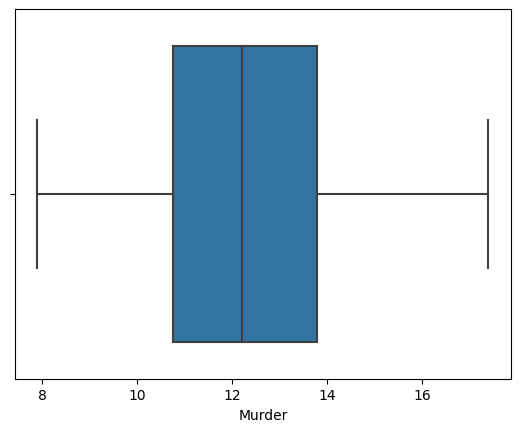

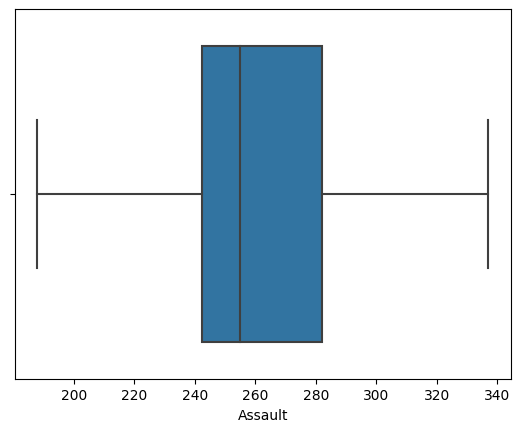

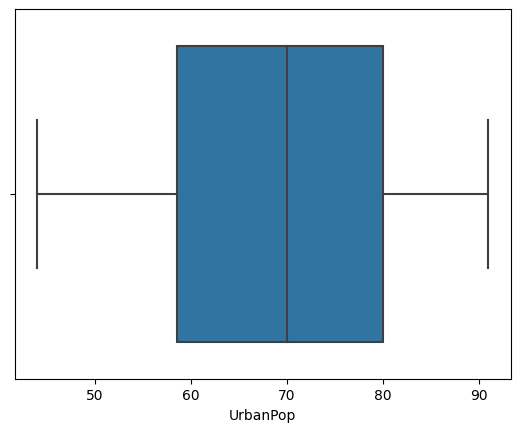

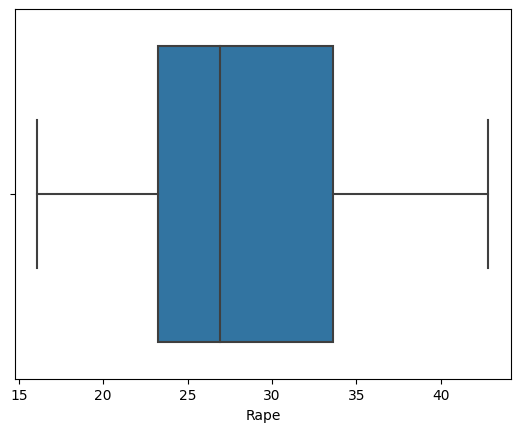

In [61]:
for i in cluster0.columns[2:6]:
    sns.boxplot(x = cluster0[i])
    plt.show()

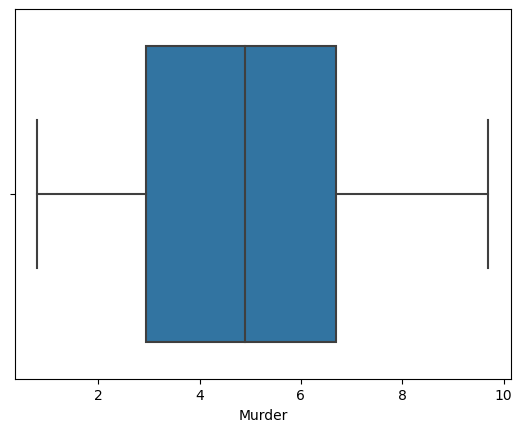

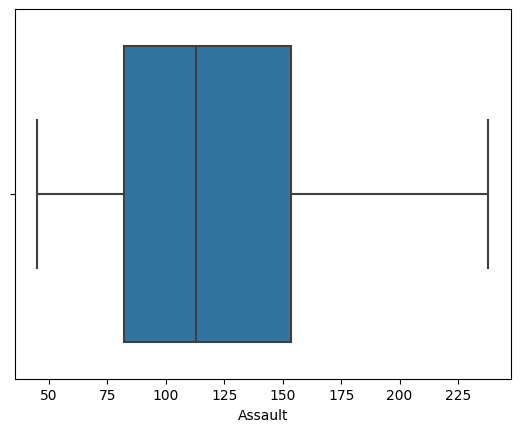

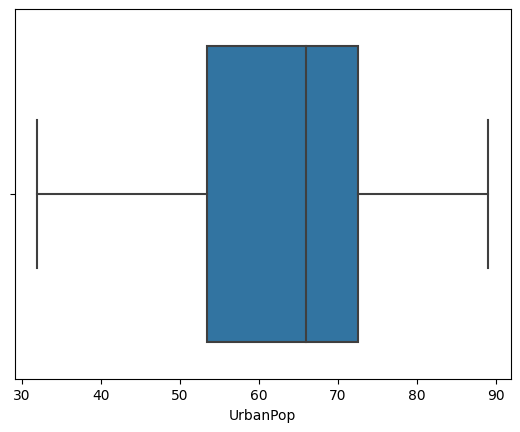

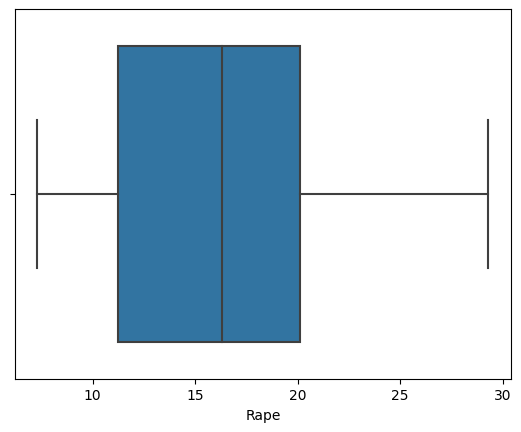

In [62]:
for i in cluster1.columns[2:6]:
    sns.boxplot(x = cluster1[i])
    plt.show()